In [30]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
variables = heart_disease.variables
variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [5]:
categorical_vars = variables[variables['type'] == 'Categorical']['name'].to_list()
int_vars = variables[variables['type'] == 'Integer']['name'].to_list()

In [6]:
X = heart_disease.data.features
y = heart_disease.data.targets

# Concatenating both features and targets
df = pd.concat([X,y], axis=1)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


## Exploring missings

We have missing values in:
- `ca`: 4 missing values
- `thal`: 2 missing values

In [16]:
print("Missing values in ca:")
print(df[df['ca'].isna()][['age', 'sex', 'cp', 'trestbps', 'chol', 'num']])

Missing values in ca:
     age  sex  cp  trestbps  chol  num
166   52    1   3       138   223    0
192   43    1   4       132   247    1
287   58    1   2       125   220    0
302   38    1   3       138   175    0


In [18]:
# Distribution of ca variable
print("\nDistribution of ca (non-missing):")
print(df[df['sex'] == 1]['ca'].value_counts().sort_index())  # Filtering by sex=1
print(f"\nMean: {df['ca'].mean():.2f}")
print(f"Median: {df['ca'].median():.2f}")
print(f"Mode: {df['ca'].mode()[0]:.0f}")


Distribution of ca (non-missing):
ca
0.0    111
1.0     50
2.0     25
3.0     16
Name: count, dtype: int64

Mean: 0.67
Median: 0.00
Mode: 0


Fill-in with 0 for convenience - Right skew distrib

In [15]:
# Check missing rows for thal
print("Missing values in thal:")
print(df[df['thal'].isna()][['age', 'sex', 'cp', 'trestbps', 'chol', 'num']])


Missing values in thal:
     age  sex  cp  trestbps  chol  num
87    53    0   3       128   216    0
266   52    1   4       128   204    2


In [19]:
# Distribution of thal variable
print("\nDistribution of thal (non-missing):")
print(df['thal'].value_counts().sort_index())
print(f"\nMean: {df['thal'].mean():.2f}")
print(f"Median: {df['thal'].median():.2f}")
print(f"Mode: {df['thal'].mode()[0]:.0f}")


Distribution of thal (non-missing):
thal
3.0    166
6.0     18
7.0    117
Name: count, dtype: int64

Mean: 4.73
Median: 3.00
Mode: 3


In [ ]:
# Impute missing values with mode - thal is a single value
df.fillna({'ca': df['ca'].mode()[0], 'thal': df['thal'].mode()[0]}, inplace=True)

In [28]:
# Validate that all missing values are imputed
assert all(df.isna().sum() == 0)

# EDA

## Categorical Variables EDA

In [31]:
# Display categorical variables
print("Categorical Variables:", categorical_vars)
print(f"\nNumber of categorical variables: {len(categorical_vars)}")

# Value counts for each categorical variable
for var in categorical_vars:
    print(f"\n{'='*60}")
    print(f"Variable: {var}")
    print(f"{'='*60}")
    print(df[var].value_counts().sort_index())
    print(f"\nUnique values: {df[var].nunique()}")


Categorical Variables: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

Number of categorical variables: 7

Variable: sex
sex
0     97
1    206
Name: count, dtype: int64

Unique values: 2

Variable: cp
cp
1     23
2     50
3     86
4    144
Name: count, dtype: int64

Unique values: 4

Variable: fbs
fbs
0    258
1     45
Name: count, dtype: int64

Unique values: 2

Variable: restecg
restecg
0    151
1      4
2    148
Name: count, dtype: int64

Unique values: 3

Variable: exang
exang
0    204
1     99
Name: count, dtype: int64

Unique values: 2

Variable: slope
slope
1    142
2    140
3     21
Name: count, dtype: int64

Unique values: 3

Variable: thal
thal
3.0    168
6.0     18
7.0    117
Name: count, dtype: int64

Unique values: 3


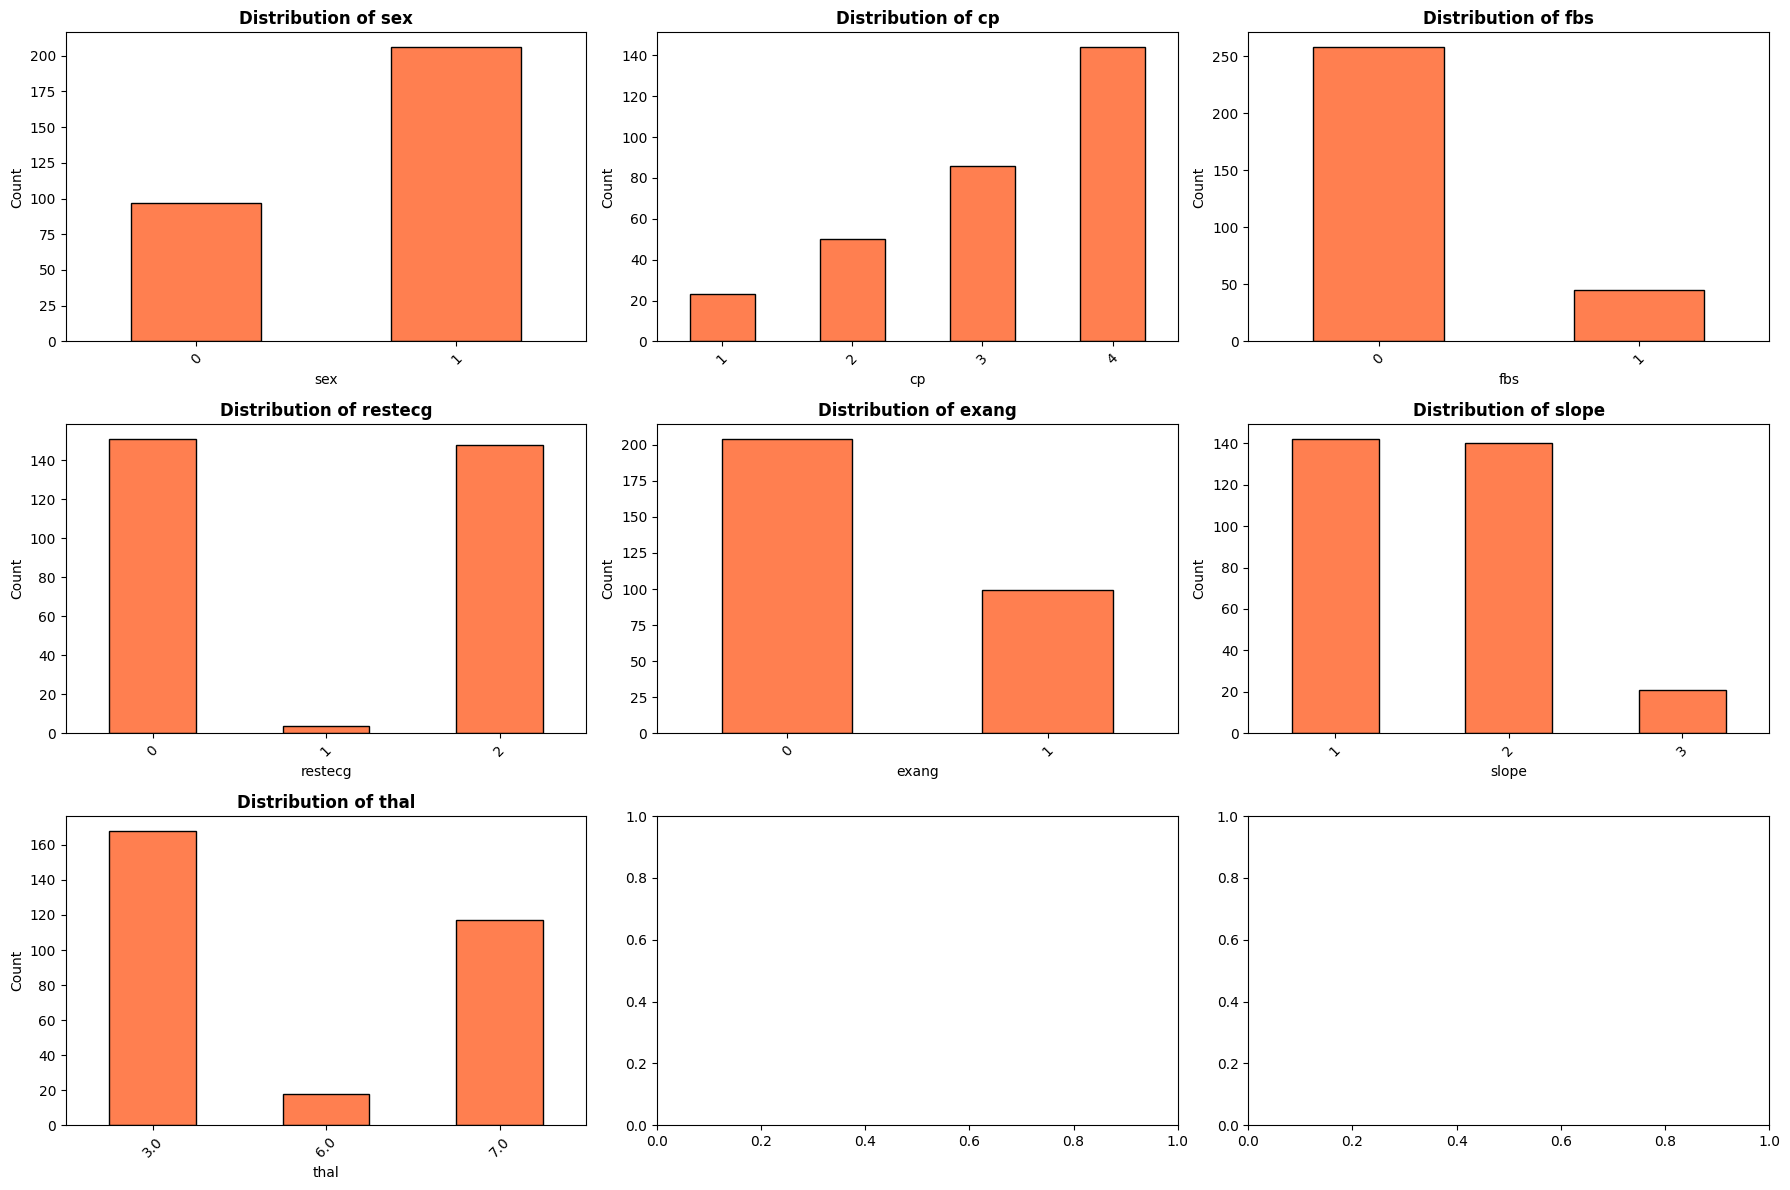

In [32]:
# Visualize distribution of categorical variables
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, var in enumerate(categorical_vars):
    df[var].value_counts().sort_index().plot(kind='bar', ax=axes[idx], color='coral', edgecolor='black')
    axes[idx].set_title(f'Distribution of {var}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(var, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


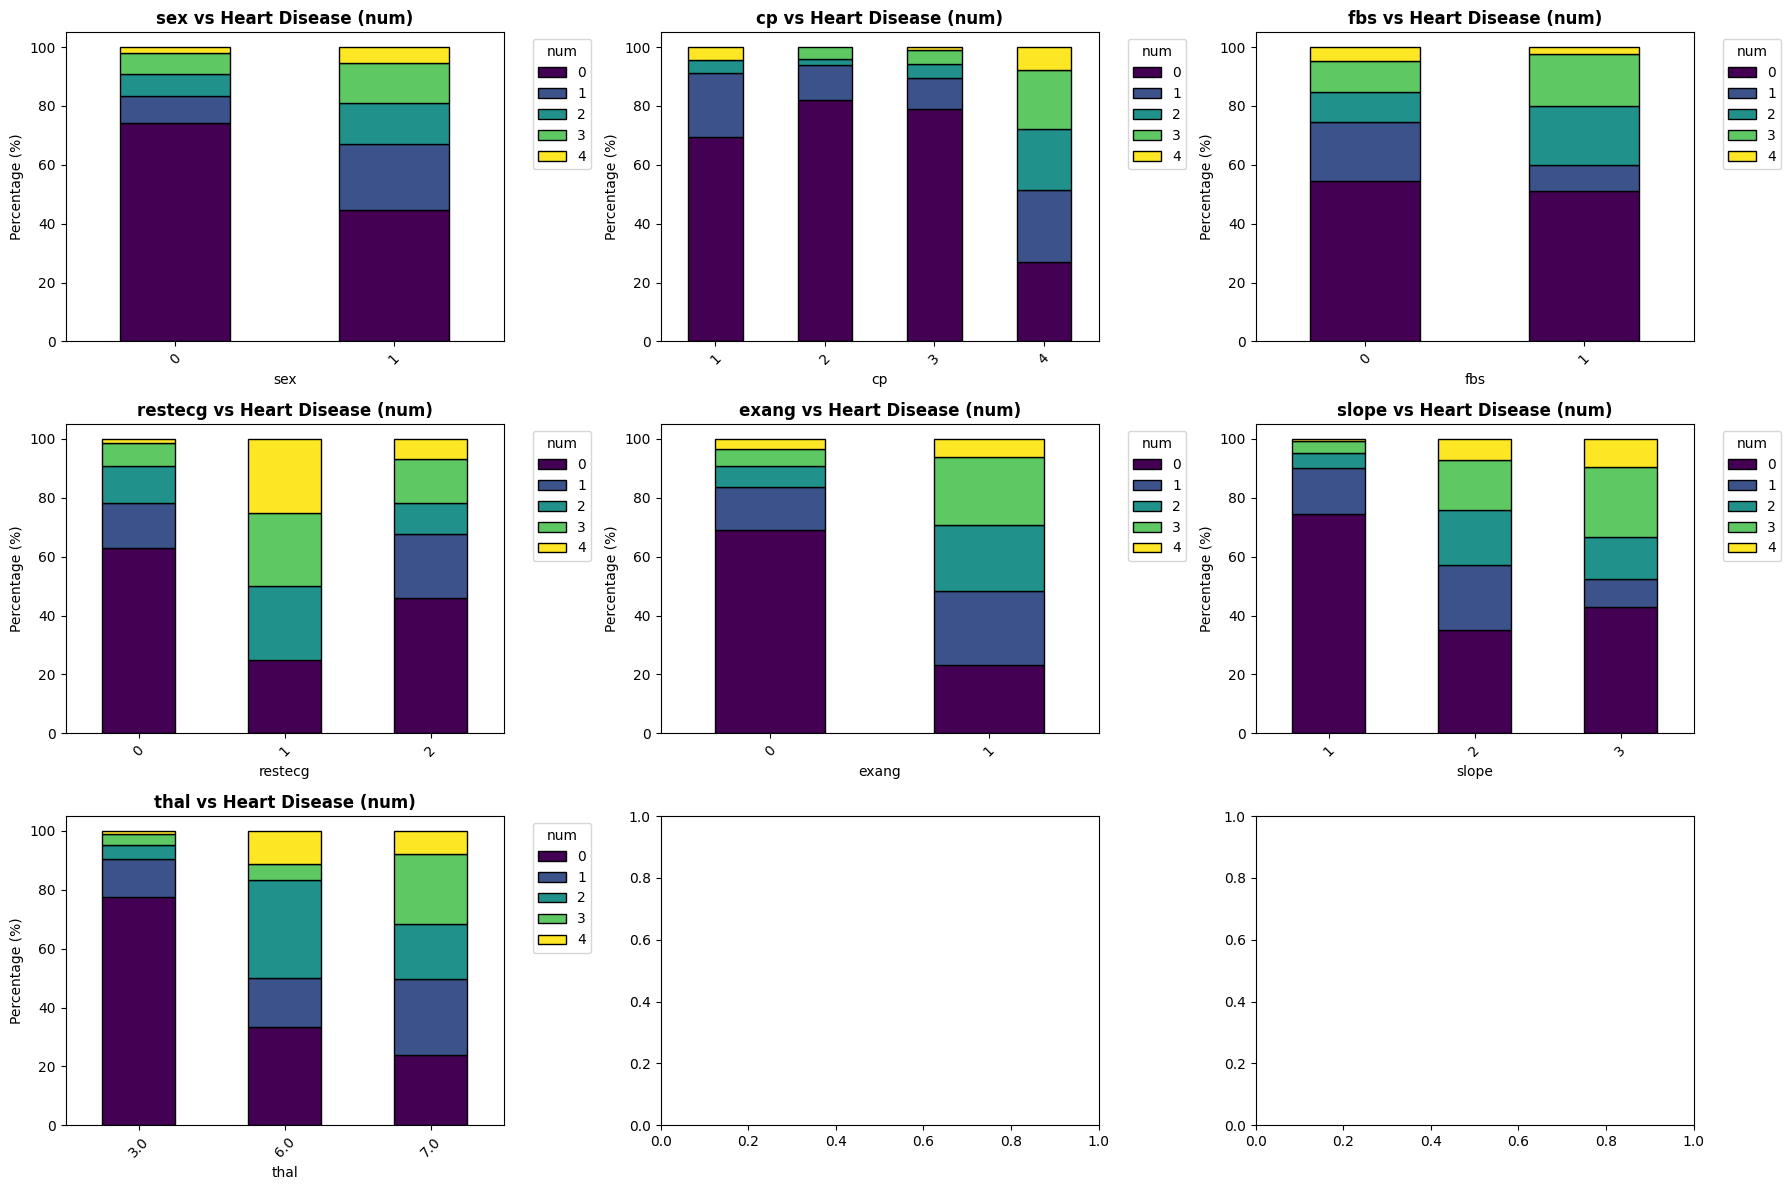

In [33]:
# Categorical variables vs Target (num)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, var in enumerate(categorical_vars):
    cross_tab = pd.crosstab(df[var], df['num'], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, ax=axes[idx], colormap='viridis', edgecolor='black')
    axes[idx].set_title(f'{var} vs Heart Disease (num)', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(var, fontsize=10)
    axes[idx].set_ylabel('Percentage (%)', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].legend(title='num', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Integer Variables EDA


In [ ]:
# Statistical summary
print("\nStatistical Summary of Integer Variables:")
print(df[int_vars].describe())


Integer Variables (Features only): ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

Number of integer variables: 6

Statistical Summary of Integer Variables:
              age    trestbps        chol     thalach     oldpeak          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944  131.689769  246.693069  149.607261    1.039604    0.663366   
std      9.038662   17.599748   51.776918   22.875003    1.161075    0.934375   
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000   
25%     48.000000  120.000000  211.000000  133.500000    0.000000    0.000000   
50%     56.000000  130.000000  241.000000  153.000000    0.800000    0.000000   
75%     61.000000  140.000000  275.000000  166.000000    1.600000    1.000000   
max     77.000000  200.000000  564.000000  202.000000    6.200000    3.000000   

              num  
count  303.000000  
mean     0.937294  
std      1.228536  
min      0.000000  
25% 

In [39]:
len(int_vars)

7

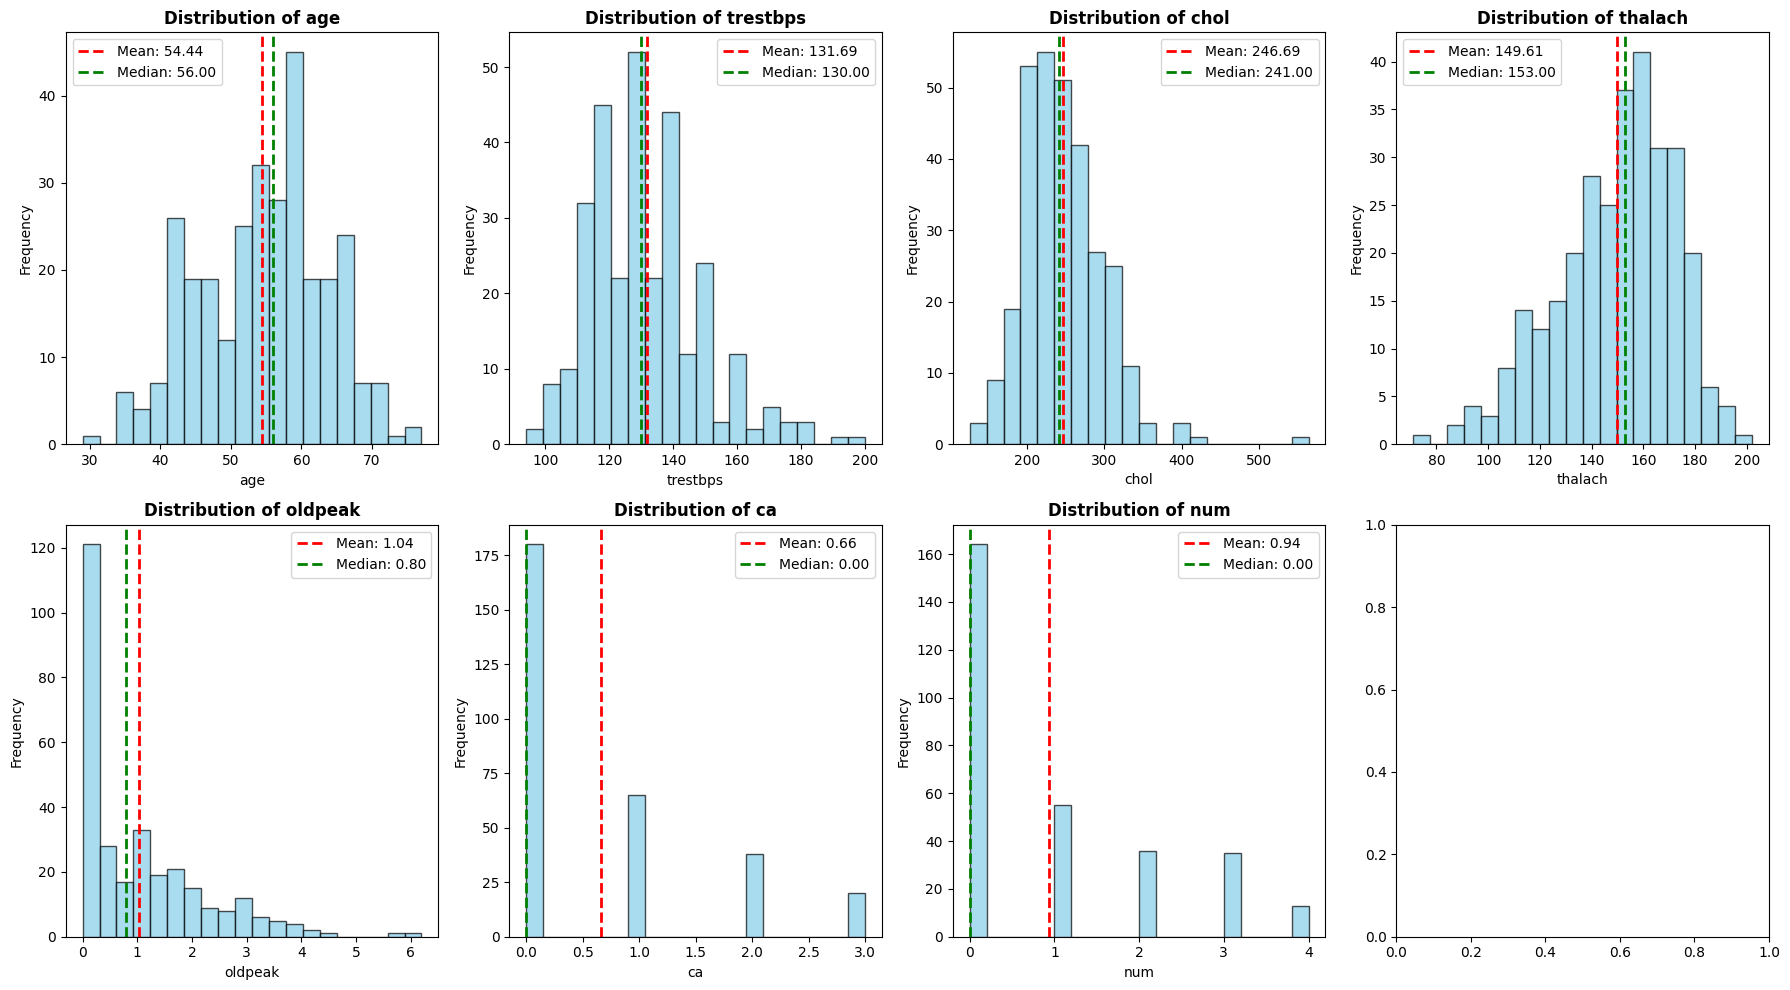

In [40]:
# Distribution of integer variables (Histograms)
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.ravel()

for idx, var in enumerate(int_vars):
    axes[idx].hist(df[var], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {var}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(var, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].axvline(df[var].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[var].mean():.2f}')
    axes[idx].axvline(df[var].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[var].median():.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()


In [53]:
df.astype({var:'str' for var in categorical_vars})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


CA can be considered categorical (low cardinality)

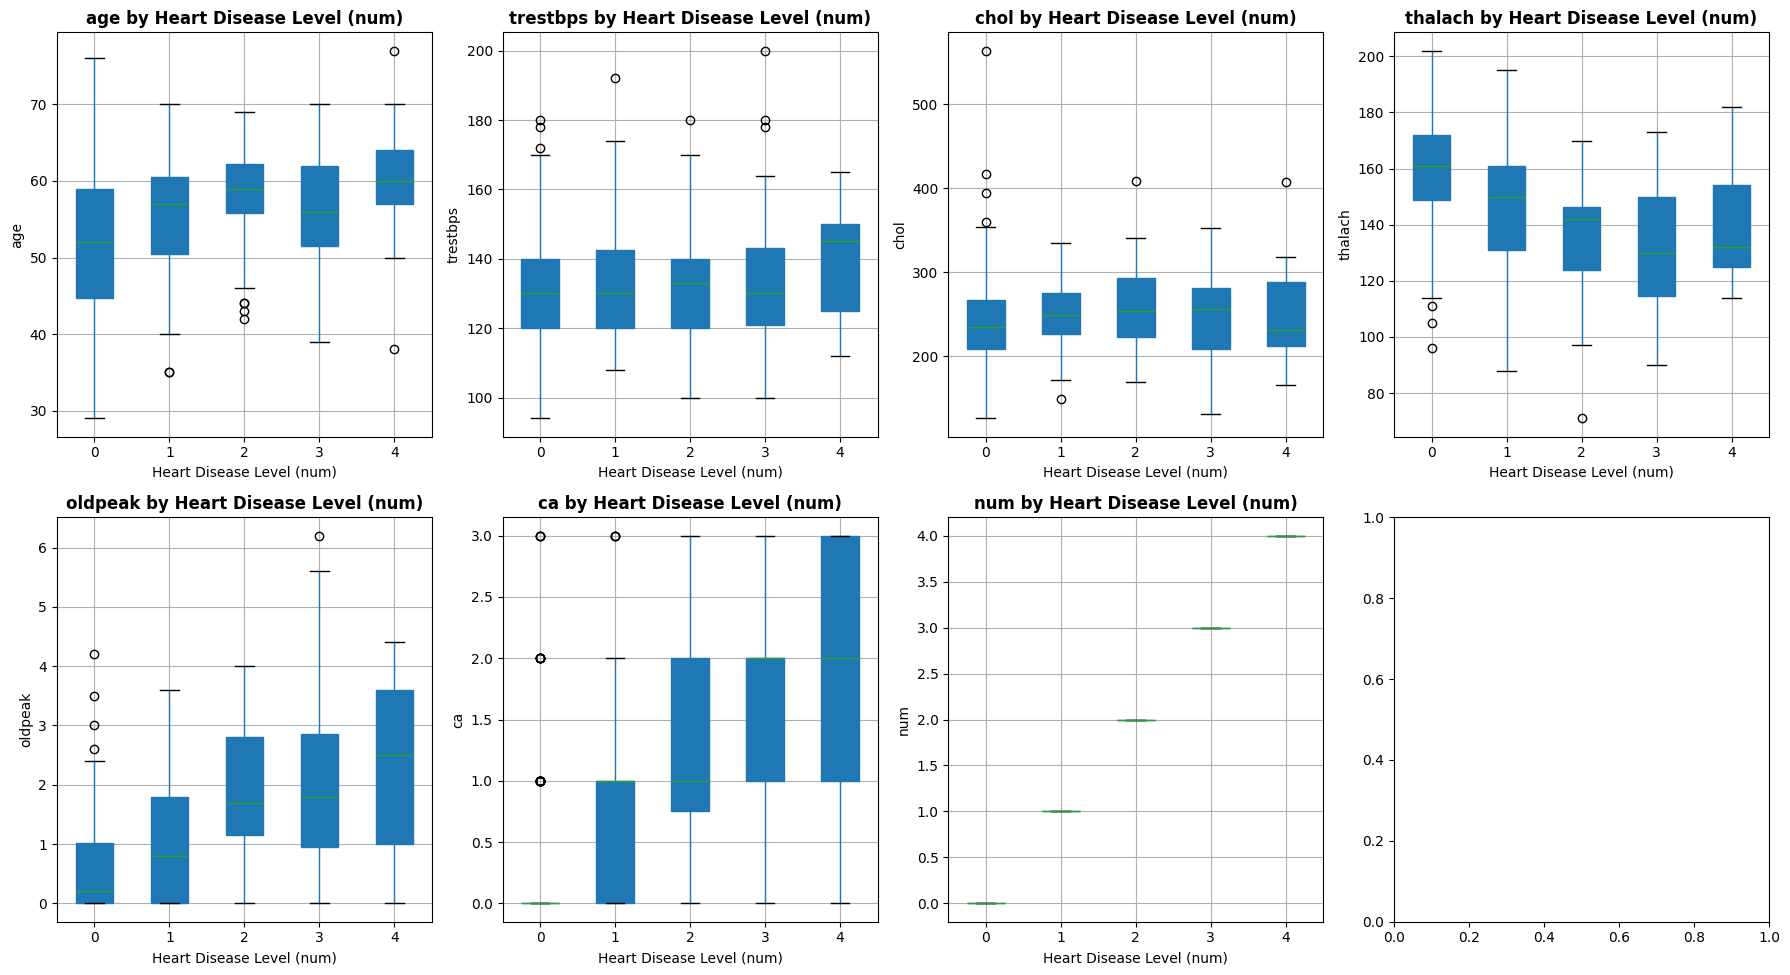

In [ ]:
# Integer variables vs Target (num) - Box plots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.ravel()

for idx, var in enumerate(int_vars):
    df.boxplot(column=var, by='num', ax=axes[idx], patch_artist=True)
    axes[idx].set_title(f'{var} by Heart Disease Level (num)', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Heart Disease Level (num)', fontsize=10)
    axes[idx].set_ylabel(var, fontsize=10)
    axes[idx].get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.show()


All variables seem to have sufficient relationship with `num` to be used

## Target Variable Analysis


Target Variable (num) Distribution:
num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Percentage distribution:
num
0    54.125413
1    18.151815
2    11.881188
3    11.551155
4     4.290429
Name: proportion, dtype: float64


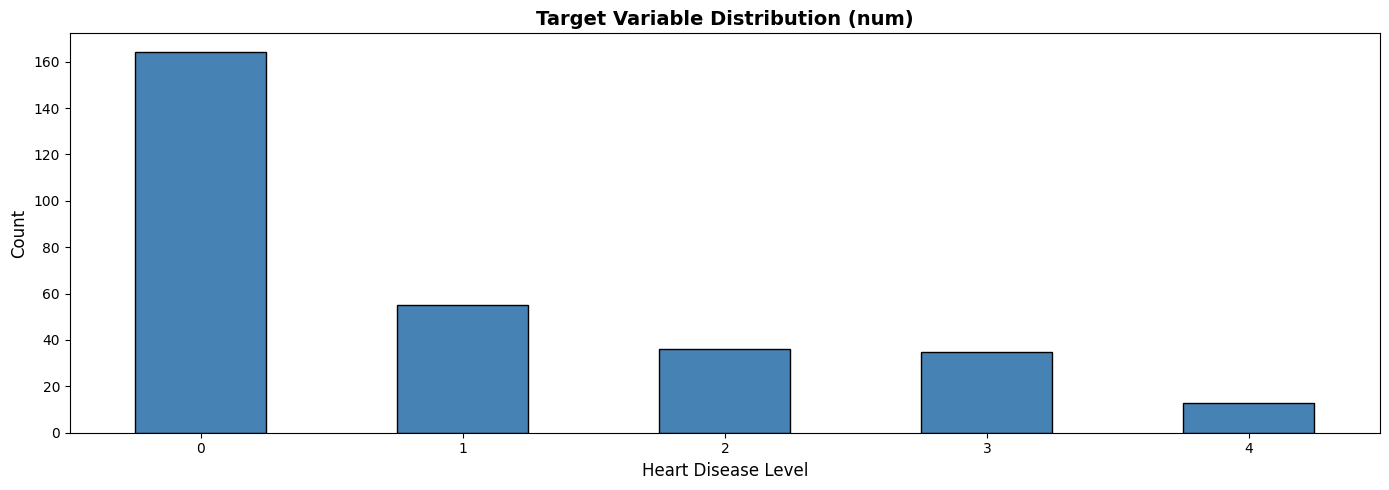

In [51]:
# Target variable distribution
print("Target Variable (num) Distribution:")
print(df['num'].value_counts().sort_index())
print(f"\nPercentage distribution:")
print(df['num'].value_counts(normalize=True).sort_index() * 100)

# Visualize target distribution
fig, ax = plt.subplots(1, 1, figsize=(14, 5))

# Count plot
df['num'].value_counts().sort_index().plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_title('Target Variable Distribution (num)', fontsize=14, fontweight='bold')
ax.set_xlabel('Heart Disease Level', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


Results could be binarized: 0 is no disease and 1 is all other categories